In [1]:
import os, json, glob, math
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../pyusct/")
from rfdata import RFdata
from scaler import RFScaler

In [3]:
LOCAL_PATH = "/media/yuhui/dea78678-112b-4f0f-acbf-4e9d1be35e351/nas/"
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01.local,share=東研究室/個人work/富井/"
MODEL_DIR = "/run/user/1000/gvfs/smb-share:server=azlab-fs01.local,share=東研究室/個人work/富井/PYUSCT_model/"

In [4]:
dir_dataset = os.path.join(LOCAL_PATH, "PYUSCT_train/dataset028/")

In [5]:
%ls $dir_dataset

input/  input_file_paths.npy  list.csv  output/  output_file_paths.npy  sa/


### Load train data

In [6]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [7]:
input_files = sorted(glob.glob(os.path.join(dir_dataset, "input/*.npy")))
output_files = sorted(glob.glob(os.path.join(dir_dataset, "output/*.npy")))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(input_files, output_files, test_size=0.2, random_state=42)

#### debug

In [9]:
len(input_files), len(output_files)

(50000, 50000)

In [10]:
len(X_train), len(X_test)

(40000, 10000)

### Define dataloader

In [11]:
from AE import RFFullDataset

### Define network

In [12]:
# TODO cycle padding
from AE import Autoencoder

### Define scaler

In [14]:
import pickle
scaler = pickle.load(open(os.path.join(MODEL_DIR, 'Scaler/Log_MinMax_RFScaler_ds028.pickle'), 'rb'))

### Experiment

In [15]:
num_epochs = 16
batch_size = 42
learning_rate = 10e-3

In [16]:
dataset = RFFullDataset(X_train, y_train, scaler)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [17]:
model = Autoencoder().cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [25]:
res = []
for epoch in range(num_epochs):
    tmp = []
    for data, _ in dataloader:
        data = Variable(data).cuda().float()
        
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tmp.append(loss.item())
        print('loss:{:.10f}'.format(loss.item()))
    # ===================log========================
    print('epoch [{}/{}], loss:{:.10f}'
          .format(epoch + 1, num_epochs, loss.item()))
    res.append(tmp)
    torch.save(model.state_dict(), os.path.join(MODEL_DIR, 'AE/rf_conv_AE_Log_MinMax.pth'))
    torch.save(model.state_dict(), './rf_conv_AE_Log_MinMax.pth')
# torch.save(model.state_dict(), './rf_conv_autoencoder.pth')

loss:0.0828669816
loss:0.0830804259
loss:0.0802255496
loss:0.0813150257
loss:0.0792611241
loss:0.0796273947
loss:0.0814859122
loss:0.0788381249
loss:0.0781803429
loss:0.0784681365
loss:0.0786433667
loss:0.0795487463
loss:0.0766325891
loss:0.0771498084
loss:0.0791635215
loss:0.0777149945
loss:0.0793760568
loss:0.0788363218
loss:0.0785569325
loss:0.0778310895
loss:0.0746820346
loss:0.0786461532
loss:0.0788639337
loss:0.0789414421
loss:0.0758206993
loss:0.0797148496
loss:0.0760761872
loss:0.0781496763
loss:0.0769828334
loss:0.0775853023
loss:0.0803102478
loss:0.0755310133
loss:0.0772092268
loss:0.0762561932
loss:0.0773371458
loss:0.0771410763
loss:0.0740460530
loss:0.0763694197
loss:0.0754588917
loss:0.0752867237
loss:0.0764634758
loss:0.0746316239
loss:0.0768929198
loss:0.0749090686
loss:0.0767518133
loss:0.0766834468
loss:0.0773263276
loss:0.0771373063
loss:0.0759904310
loss:0.0772736520
loss:0.0765308067
loss:0.0764319152
loss:0.0797257274
loss:0.0784606338
loss:0.0753558874
loss:0.077

loss:0.0695029572
loss:0.0729507506
loss:0.0755866617
loss:0.0759952590
loss:0.0750490651
loss:0.0750207603
loss:0.0749840215
loss:0.0747100636
loss:0.0737227798
loss:0.0737358630
loss:0.0737565681
loss:0.0753175691
loss:0.0733682960
loss:0.0740183517
loss:0.0729037523
loss:0.0733962730
loss:0.0734795257
loss:0.0744334459
loss:0.0730331838
loss:0.0747502074
loss:0.0719180256
loss:0.0717346594
loss:0.0716527179
loss:0.0715829432
loss:0.0731556490
loss:0.0736846253
loss:0.0746627003
loss:0.0723531172
loss:0.0718669295
loss:0.0739476159
loss:0.0706776828
loss:0.0733307824
loss:0.0718832910
loss:0.0747008249
loss:0.0748108923
loss:0.0745502412
loss:0.0719250590
loss:0.0713725537
loss:0.0713217333
loss:0.0711707473
loss:0.0722032785
loss:0.0722609237
loss:0.0719863251
loss:0.0699718893
loss:0.0715254024
loss:0.0723807886
loss:0.0715507865
loss:0.0717868060
loss:0.0719338581
loss:0.0731867924
loss:0.0730015412
loss:0.0714923590
loss:0.0709020793
loss:0.0698900595
loss:0.0706373304
loss:0.070

loss:0.0687928498
loss:0.0691397116
loss:0.0684535280
loss:0.0689687878
loss:0.0692114606
loss:0.0680195168
loss:0.0683387369
loss:0.0695442185
loss:0.0681887642
loss:0.0692640394
loss:0.0704505369
loss:0.0687123835
loss:0.0682372451
loss:0.0697592720
loss:0.0686513707
loss:0.0686658695
loss:0.0691136494
loss:0.0688399747
loss:0.0691790357
loss:0.0700198784
loss:0.0689551830
loss:0.0690842122
loss:0.0689904839
loss:0.0689986274
loss:0.0684763044
loss:0.0701322556
loss:0.0678202361
loss:0.0681240112
loss:0.0683146343
loss:0.0684549958
loss:0.0699280873
loss:0.0697814524
loss:0.0681603774
loss:0.0681145042
loss:0.0686093792
loss:0.0682179183
loss:0.0680429339
loss:0.0675187483
loss:0.0684854537
loss:0.0703317001
loss:0.0687419623
epoch [1/16], loss:0.0687419623
loss:0.0685112104
loss:0.0683271736
loss:0.0683764666
loss:0.0701654404
loss:0.0703192800
loss:0.0718976781
loss:0.0696673095
loss:0.0688860789
loss:0.0686390698
loss:0.0704247877
loss:0.0708603263
loss:0.0691770390
loss:0.0697480

loss:0.0702128708
loss:0.0692861974
loss:0.0683725327
loss:0.0696530864
loss:0.0700199157
loss:0.0698977411
loss:0.0691069812
loss:0.0683826879
loss:0.0698531047
loss:0.0683054626
loss:0.0695044920
loss:0.0689894781
loss:0.0696912855
loss:0.0700260177
loss:0.0681091994
loss:0.0688438565
loss:0.0693432391
loss:0.0680096895
loss:0.0691137910
loss:0.0686775148
loss:0.0703336298
loss:0.0677574426
loss:0.0695439354
loss:0.0687790737
loss:0.0690375194
loss:0.0691434368
loss:0.0694566444
loss:0.0690731257
loss:0.0669101849
loss:0.0688044056
loss:0.0677823871
loss:0.0705198422
loss:0.0688415691
loss:0.0700140297
loss:0.0697239339
loss:0.0690960959
loss:0.0690753385
loss:0.0704866648
loss:0.0679421872
loss:0.0694161057
loss:0.0693994835
loss:0.0685696974
loss:0.0690661222
loss:0.0697809681
loss:0.0683316365
loss:0.0680509731
loss:0.0694622174
loss:0.0695021302
loss:0.0689736232
loss:0.0675195381
loss:0.0676020756
loss:0.0689408630
loss:0.0686519891
loss:0.0704263970
loss:0.0690472126
loss:0.068

loss:0.0690982193
loss:0.0679702386
loss:0.0674395710
loss:0.0694829002
loss:0.0688290223
loss:0.0681808665
loss:0.0690350458
loss:0.0687864274
loss:0.0684747845
loss:0.0685938969
loss:0.0684299394
loss:0.0677006766
loss:0.0674948990
loss:0.0708243027
loss:0.0669420734
loss:0.0683124512
loss:0.0691329241
loss:0.0682131052
loss:0.0682813749
loss:0.0694617108
loss:0.0679309592
loss:0.0690694898
loss:0.0695913583
loss:0.0680474266
loss:0.0699580610
loss:0.0684128851
loss:0.0682096556
loss:0.0689192265
loss:0.0698942244
loss:0.0684438124
loss:0.0681171343
loss:0.0684313104
loss:0.0686902776
loss:0.0670985952
loss:0.0683416054
loss:0.0692199096
loss:0.0687422603
loss:0.0684169158
loss:0.0684502944
loss:0.0681536794
loss:0.0679875240
loss:0.0689247772
loss:0.0689952746
loss:0.0677745491
loss:0.0686218590
loss:0.0689830258
loss:0.0682900548
loss:0.0700112954
loss:0.0719652176
loss:0.0677557290
loss:0.0678852275
loss:0.0680031702
loss:0.0668786690
loss:0.0696808994
loss:0.0695954561
loss:0.067

loss:0.0729753301
loss:0.0712086633
loss:0.0730035976
loss:0.0741117448
loss:0.0712870955
loss:0.0712325051
loss:0.0699074119
loss:0.0700098053
loss:0.0707877204
loss:0.0707805231
loss:0.0737967119
loss:0.0713340119
loss:0.0696255565
loss:0.0712339506
loss:0.0706915855
loss:0.0727516338
loss:0.0703056976
loss:0.0694053918
loss:0.0696306080
loss:0.0702985302
loss:0.0698773637
loss:0.0704243183
loss:0.0690485761
loss:0.0713462532
loss:0.0690008476
loss:0.0695040450
loss:0.0690735579
loss:0.0683640093
loss:0.0696531758
loss:0.0694343001
loss:0.0694628507
loss:0.0697523430
loss:0.0687951446
loss:0.0698309988
loss:0.0702301413
loss:0.0692964196
loss:0.0689003095
loss:0.0709230155
loss:0.0702244863
loss:0.0703915507
loss:0.0702550709
loss:0.0698760748
loss:0.0698733404
loss:0.0689805225
loss:0.0678819120
loss:0.0688299388
loss:0.0675139800
loss:0.0683265626
loss:0.0699022263
loss:0.0685704723
loss:0.0700997636
loss:0.0694839209
loss:0.0689726248
loss:0.0700462013
loss:0.0698163807
loss:0.069

loss:0.0691309944
loss:0.0682889074
loss:0.0690797046
loss:0.0684285238
loss:0.0683763325
loss:0.0667887405
loss:0.0678377673
loss:0.0681173652
loss:0.0672352538
loss:0.0681313202
loss:0.0679026395
loss:0.0704114139
loss:0.0678542927
loss:0.0677491128
loss:0.0679741725
loss:0.0681443140
loss:0.0704885274
loss:0.0701863468
loss:0.0682753101
loss:0.0701254606
loss:0.0696922839
loss:0.0683909133
loss:0.0693832487
loss:0.0685428753
loss:0.0682631284
loss:0.0677918494
loss:0.0680943951
loss:0.0696130916
loss:0.0680970401
loss:0.0674492791
loss:0.0667063668
loss:0.0690956935
loss:0.0692307726
loss:0.0682256594
loss:0.0683178529
loss:0.0688938424
loss:0.0680976734
loss:0.0689371526
loss:0.0670969859
loss:0.0689927638
loss:0.0681194216
loss:0.0680904388
loss:0.0682710782
loss:0.0702119470
loss:0.0670706406
loss:0.0678010285
loss:0.0678983703
loss:0.0712580979
loss:0.0687347129
loss:0.0681377202
loss:0.0680981427
loss:0.0698534846
loss:0.0695790350
loss:0.0684520751
loss:0.0685687661
loss:0.070

loss:0.0676474199
loss:0.0686450079
loss:0.0679860860
loss:0.0699460283
loss:0.0687673762
loss:0.0686929151
loss:0.0663715824
loss:0.0687049106
loss:0.0680132657
loss:0.0689372048
loss:0.0675856993
loss:0.0689936653
loss:0.0694794953
loss:0.0671718195
loss:0.0697612613
loss:0.0686121210
loss:0.0694901496
loss:0.0684188530
loss:0.0679583177
loss:0.0698405281
loss:0.0674159825
loss:0.0684853122
loss:0.0690755397
loss:0.0681071132
loss:0.0687879398
loss:0.0694277361
loss:0.0673859343
loss:0.0683282688
loss:0.0697127059
loss:0.0680715591
loss:0.0679152757
loss:0.0673017427
loss:0.0689269304
loss:0.0687724203
loss:0.0677464828
loss:0.0688488483
loss:0.0684532151
loss:0.0687187612
loss:0.0677764863
loss:0.0700114220
loss:0.0686761439
loss:0.0673622936
loss:0.0703642592
loss:0.0687334761
loss:0.0690039173
loss:0.0702925771
loss:0.0686445385
loss:0.0692161173
loss:0.0680408701
loss:0.0692643523
loss:0.0684017837
loss:0.0674902350
loss:0.0691510141
loss:0.0693367720
loss:0.0664180815
loss:0.067

loss:0.0675307810
loss:0.0694982186
loss:0.0675740689
loss:0.0676538125
loss:0.0677771568
loss:0.0692228675
loss:0.0695861951
loss:0.0693351105
loss:0.0673444942
loss:0.0671939775
loss:0.0676101074
loss:0.0679047182
loss:0.0683417544
loss:0.0687926412
loss:0.0673922226
loss:0.0689909309
loss:0.0675365776
loss:0.0679686069
loss:0.0674629733
loss:0.0692271888
loss:0.0682781190
loss:0.0683705807
loss:0.0673682168
loss:0.0688909367
loss:0.0694160461
loss:0.0690465569
loss:0.0677248240
loss:0.0678678676
loss:0.0677448660
loss:0.0686856657
loss:0.0682611391
loss:0.0678072944
loss:0.0691575557
loss:0.0683154538
loss:0.0687747002
loss:0.0691093281
loss:0.0665009245
loss:0.0679002926
loss:0.0695330352
loss:0.0698510855
loss:0.0688450113
loss:0.0679425076
loss:0.0683949664
loss:0.0686911419
loss:0.0696497634
loss:0.0700756982
loss:0.0684939772
loss:0.0683903843
loss:0.0698214173
loss:0.0694122761
loss:0.0701195300
loss:0.0694843084
loss:0.0673789009
loss:0.0681469813
loss:0.0677069649
loss:0.068

loss:0.0691921562
loss:0.0682717562
loss:0.0691790953
loss:0.0697208270
loss:0.0697496608
loss:0.0678828433
loss:0.0676593781
loss:0.0692029297
loss:0.0677637905
loss:0.0683795139
loss:0.0684709251
loss:0.0686012879
loss:0.0687297285
loss:0.0683617368
loss:0.0673826560
loss:0.0709830895
loss:0.0686740354
loss:0.0690422729
loss:0.0687393397
loss:0.0669631884
loss:0.0690435171
loss:0.0686461404
loss:0.0681752041
loss:0.0676148385
loss:0.0705569610
loss:0.0678585172
loss:0.0672749504
loss:0.0686401203
loss:0.0700727478
loss:0.0689511821
loss:0.0691370741
loss:0.0677535906
loss:0.0689023286
loss:0.0699121580
loss:0.0688681826
loss:0.0695715919
loss:0.0689517781
loss:0.0675608814
loss:0.0679005012
loss:0.0680151805
loss:0.0667553023
loss:0.0669163167
loss:0.0699964389
loss:0.0667847916
loss:0.0679159537
loss:0.0669149607
loss:0.0691916198
loss:0.0682504997
loss:0.0691229478
loss:0.0698005185
loss:0.0681061074
loss:0.0674468055
loss:0.0686527938
loss:0.0683590621
loss:0.0680248737
loss:0.068

loss:0.0672434643
loss:0.0678862184
loss:0.0707865283
loss:0.0672556534
loss:0.0687715933
loss:0.0675396994
loss:0.0672553331
loss:0.0684185401
loss:0.0684148669
loss:0.0681772903
loss:0.0680101514
loss:0.0682047531
loss:0.0698029324
loss:0.0690009743
loss:0.0670443401
loss:0.0669943839
loss:0.0691188276
loss:0.0672951415
loss:0.0679868460
loss:0.0677970797
loss:0.0667862743
loss:0.0681579635
loss:0.0701972619
loss:0.0676759407
loss:0.0675010085
loss:0.0680582449
loss:0.0671627745
loss:0.0667234287
loss:0.0670116246
loss:0.0686059073
loss:0.0685245469
loss:0.0677795038
loss:0.0688080415
loss:0.0674868301
loss:0.0678821206
loss:0.0667917281
loss:0.0679627359
loss:0.0678148493
loss:0.0668837652
loss:0.0709209219
loss:0.0671448037
loss:0.0679953843
loss:0.0692291334
loss:0.0680866018
loss:0.0663953871
loss:0.0691822991
loss:0.0683563650
loss:0.0677111968
loss:0.0669684038
loss:0.0669938326
loss:0.0682502761
loss:0.0677977353
loss:0.0668780506
loss:0.0671954751
loss:0.0667572990
loss:0.068

loss:0.0661379918
loss:0.0665406734
loss:0.0664659292
loss:0.0671116635
loss:0.0676370710
loss:0.0666003600
loss:0.0673616305
loss:0.0673890486
loss:0.0671831742
loss:0.0670768842
loss:0.0674189404
loss:0.0672995895
loss:0.0675834194
loss:0.0682332292
loss:0.0676394254
loss:0.0681082308
loss:0.0672159269
loss:0.0674277619
loss:0.0676153824
loss:0.0667218417
loss:0.0679215789
loss:0.0681931823
loss:0.0681668296
loss:0.0677611977
loss:0.0682482719
loss:0.0687499121
loss:0.0677556321
loss:0.0674074516
loss:0.0673541203
loss:0.0680761337
loss:0.0668238699
loss:0.0684173703
loss:0.0663875267
loss:0.0681027621
loss:0.0674851313
loss:0.0670430139
loss:0.0665416345
loss:0.0669820160
loss:0.0669369325
loss:0.0665045604
loss:0.0679158196
loss:0.0676137432
loss:0.0668049678
loss:0.0666798800
loss:0.0671008602
loss:0.0683672056
loss:0.0667190999
loss:0.0687214807
loss:0.0671133250
loss:0.0688371360
loss:0.0674076900
loss:0.0676930100
loss:0.0677918568
loss:0.0666547939
loss:0.0691620037
loss:0.066

loss:0.0675887167
loss:0.0667892024
loss:0.0670113862
loss:0.0664922521
loss:0.0665374324
loss:0.0675690174
loss:0.0672594011
loss:0.0666013211
loss:0.0659686029
loss:0.0655635521
loss:0.0674111396
loss:0.0664352849
loss:0.0661626309
loss:0.0685531795
loss:0.0654491410
loss:0.0681411028
loss:0.0667665824
loss:0.0674971789
loss:0.0690165162
loss:0.0675928444
loss:0.0662777871
loss:0.0670935959
loss:0.0668013319
loss:0.0675644353
loss:0.0685753003
loss:0.0666868538
loss:0.0669914186
loss:0.0662105605
loss:0.0675054640
loss:0.0666384175
loss:0.0662730634
loss:0.0669204593
loss:0.0676322207
loss:0.0663469732
loss:0.0652198270
loss:0.0667896718
loss:0.0680145994
loss:0.0659305528
loss:0.0659949854
loss:0.0661464408
loss:0.0672456548
loss:0.0681882724
loss:0.0681681037
loss:0.0682519972
loss:0.0655266866
loss:0.0658696815
loss:0.0667849183
loss:0.0667508841
loss:0.0673044845
loss:0.0684549212
loss:0.0655693188
loss:0.0658127293
loss:0.0678687394
loss:0.0677361935
loss:0.0682966709
loss:0.066

loss:0.0655749217
loss:0.0664414838
loss:0.0664290786
loss:0.0678745955
loss:0.0654642135
loss:0.0673573390
loss:0.0665737614
loss:0.0680985525
loss:0.0660411716
loss:0.0665955693
loss:0.0670910031
loss:0.0672569647
loss:0.0666004941
loss:0.0658182502
loss:0.0656601191
loss:0.0678861216
loss:0.0686487854
loss:0.0689435080
loss:0.0676417500
loss:0.0665804297
loss:0.0674983785
loss:0.0671110749
loss:0.0665670335
loss:0.0677114576
loss:0.0661159903
loss:0.0663898513
loss:0.0669887215
loss:0.0661738217
loss:0.0652282760
loss:0.0667722896
loss:0.0669110268
loss:0.0669899061
loss:0.0662017316
loss:0.0663119182
loss:0.0678526387
loss:0.0653350577
loss:0.0663893372
loss:0.0672757402
loss:0.0674597323
loss:0.0655957609
loss:0.0678235292
loss:0.0659385696
loss:0.0681049824
loss:0.0658717677
loss:0.0656025484
loss:0.0685504302
loss:0.0672586709
loss:0.0663435906
loss:0.0666638091
loss:0.0668549985
loss:0.0667399541
loss:0.0682192445
loss:0.0664164498
loss:0.0671174675
loss:0.0660445690
loss:0.065

loss:0.0656659901
loss:0.0673521087
loss:0.0668106303
loss:0.0661336407
loss:0.0663366318
loss:0.0677677467
loss:0.0673601925
loss:0.0645263121
loss:0.0664888471
loss:0.0665029660
loss:0.0673126951
loss:0.0652153939
loss:0.0662568361
loss:0.0660481751
loss:0.0659715757
loss:0.0667521581
loss:0.0671614185
loss:0.0660614148
loss:0.0671447217
loss:0.0670942813
loss:0.0664239451
loss:0.0680427998
loss:0.0660506710
loss:0.0655279234
loss:0.0665475726
loss:0.0667749271
loss:0.0668789223
loss:0.0668379292
loss:0.0668754429
loss:0.0665202439
loss:0.0662603751
loss:0.0671043471
loss:0.0657058582
loss:0.0668206885
loss:0.0681406781
loss:0.0675224140
loss:0.0667576119
loss:0.0667223781
loss:0.0672394857
loss:0.0661007762
loss:0.0686246753
loss:0.0655831173
loss:0.0662952736
loss:0.0658652112
loss:0.0659021735
loss:0.0682870746
loss:0.0653105825
loss:0.0670385286
loss:0.0668789521
loss:0.0666853189
loss:0.0667589232
loss:0.0667577758
loss:0.0675786808
loss:0.0650660917
loss:0.0688726828
loss:0.067

loss:0.0665273294
loss:0.0657854602
loss:0.0668367594
loss:0.0675073862
loss:0.0659226105
loss:0.0656396300
loss:0.0661584958
loss:0.0693141967
loss:0.0672232062
loss:0.0663057342
loss:0.0665056631
loss:0.0656912848
loss:0.0672382861
loss:0.0667631179
loss:0.0670959875
loss:0.0677191466
loss:0.0660798252
loss:0.0665237457
loss:0.0670713037
loss:0.0665560439
loss:0.0666429400
loss:0.0659504309
loss:0.0661627203
loss:0.0662679896
loss:0.0671141818
loss:0.0653976873
loss:0.0686964244
loss:0.0653524324
loss:0.0668015853
loss:0.0664425269
loss:0.0655113310
loss:0.0661997721
loss:0.0674605668
loss:0.0664461032
loss:0.0674288347
loss:0.0674823374
loss:0.0685339123
loss:0.0683376417
loss:0.0672032014
loss:0.0671557337
loss:0.0656504110
loss:0.0660648718
loss:0.0686284900
loss:0.0663663372
loss:0.0654679313
loss:0.0668725148
loss:0.0668218806
loss:0.0673171282
loss:0.0666320473
loss:0.0660388619
loss:0.0653034970
loss:0.0656669661
loss:0.0664613098
loss:0.0660016984
loss:0.0663433522
loss:0.067

loss:0.0671681836
loss:0.0688410699
loss:0.0673182383
loss:0.0671895295
loss:0.0674521700
loss:0.0663388893
loss:0.0665479079
loss:0.0665550157
loss:0.0675667524
loss:0.0651947036
loss:0.0665270686
loss:0.0653154925
loss:0.0689461529
loss:0.0673407093
loss:0.0673508570
loss:0.0662942603
loss:0.0654206276
loss:0.0687658563
loss:0.0675988495
loss:0.0668443516
loss:0.0687204376
loss:0.0667266473
loss:0.0667867512
loss:0.0655426607
loss:0.0675108135
loss:0.0668621138
loss:0.0660414323
loss:0.0673814490
loss:0.0654868037
loss:0.0665028319
loss:0.0660568252
loss:0.0658310726
loss:0.0672679767
loss:0.0667945519
loss:0.0661702156
loss:0.0660740808
loss:0.0665175393
loss:0.0659668148
loss:0.0665812790
loss:0.0668953061
loss:0.0655398741
loss:0.0667152479
loss:0.0666885972
loss:0.0687531829
loss:0.0655775592
loss:0.0661170185
loss:0.0643038377
loss:0.0676440075
loss:0.0661104769
loss:0.0664139912
loss:0.0661191121
loss:0.0678863749
loss:0.0665662959
loss:0.0660071522
loss:0.0667426437
loss:0.067

loss:0.0658910498
loss:0.0653148741
loss:0.0647794232
loss:0.0656398013
loss:0.0676559582
loss:0.0667959452
loss:0.0668494254
loss:0.0674935207
loss:0.0655067265
loss:0.0662130415
loss:0.0669635311
loss:0.0653412044
loss:0.0672250018
loss:0.0669202507
loss:0.0650828555
loss:0.0669138879
loss:0.0651251674
loss:0.0661820322
loss:0.0659267753
loss:0.0657612830
loss:0.0648690313
loss:0.0661095306
loss:0.0663033351
loss:0.0669745058
loss:0.0722792968
loss:0.0669171289
loss:0.0669956058
loss:0.0674295649
loss:0.0671975017
loss:0.0676595643
loss:0.0671121776
loss:0.0668419972
loss:0.0653545931
loss:0.0667738467
loss:0.0678060427
loss:0.0674131066
loss:0.0661353320
loss:0.0672706515
loss:0.0670708567
loss:0.0670925751
loss:0.0685150698
loss:0.0655640662
loss:0.0666881576
loss:0.0656462535
loss:0.0658267513
loss:0.0666102916
loss:0.0657806769
loss:0.0667020977
loss:0.0657159835
loss:0.0662712529
loss:0.0665169656
loss:0.0689594224
loss:0.0661669075
loss:0.0663637072
loss:0.0659706444
loss:0.065

loss:0.0662524998
loss:0.0662964880
loss:0.0669430345
loss:0.0652863458
loss:0.0661159679
loss:0.0661424696
loss:0.0665135011
loss:0.0666090921
loss:0.0682301819
loss:0.0671468973
loss:0.0668657422
loss:0.0670562461
loss:0.0652284697
loss:0.0670026839
loss:0.0673280358
loss:0.0660393313
loss:0.0657977313
loss:0.0663504377
loss:0.0670302212
loss:0.0659278557
loss:0.0669786483
loss:0.0664957240
loss:0.0668010712
loss:0.0662125573
loss:0.0646826178
loss:0.0666397586
loss:0.0667231828
loss:0.0670613125
loss:0.0655845255
loss:0.0673657730
loss:0.0664347410
loss:0.0659660995
loss:0.0652193949
loss:0.0669668689
loss:0.0672090873
loss:0.0672956631
loss:0.0668976232
loss:0.0661807656
loss:0.0666532665
loss:0.0666884333
loss:0.0682648346
loss:0.0671420470
loss:0.0658330172
loss:0.0665892959
loss:0.0664224178
loss:0.0645403191
loss:0.0660083741
loss:0.0672526583
loss:0.0653544441
loss:0.0675159097
loss:0.0654885098
loss:0.0671793744
loss:0.0683844686
loss:0.0660911053
loss:0.0657631829
loss:0.066

loss:0.0664689839
loss:0.0664104670
loss:0.0659435838
loss:0.0656930655
loss:0.0665977150
loss:0.0661022514
loss:0.0662370995
loss:0.0657941848
loss:0.0668255165
loss:0.0648628697
loss:0.0702599287
loss:0.0650380105
loss:0.0674629584
loss:0.0669474378
loss:0.0665436909
loss:0.0669521019
loss:0.0663546771
loss:0.0661874786
loss:0.0669512376
loss:0.0661716014
loss:0.0665507242
loss:0.0670610890
loss:0.0654805973
loss:0.0659299865
loss:0.0677504614
loss:0.0667105615
loss:0.0649837032
loss:0.0672630817
loss:0.0662563518
loss:0.0668354705
loss:0.0668835565
loss:0.0657730550
loss:0.0686944276
loss:0.0659667179
loss:0.0664612576
loss:0.0663424507
loss:0.0658775419
loss:0.0656523034
loss:0.0668190271
loss:0.0668544397
loss:0.0667478591
loss:0.0666722357
loss:0.0670095235
loss:0.0666810274
loss:0.0654241443
loss:0.0676614940
loss:0.0651336461
loss:0.0672955886
loss:0.0654352903
loss:0.0660489202
loss:0.0677390993
loss:0.0663701445
loss:0.0674386099
loss:0.0675959140
loss:0.0651529506
loss:0.065

loss:0.0681678206
loss:0.0663513020
loss:0.0662579387
loss:0.0662916601
loss:0.0655382425
loss:0.0666546673
loss:0.0677657425
loss:0.0665135011
loss:0.0683212578
loss:0.0662519783
loss:0.0663194135
loss:0.0668560192
loss:0.0672073588
loss:0.0672048330
loss:0.0662912950
loss:0.0670002103
loss:0.0658157095
loss:0.0677955598
loss:0.0666540712
loss:0.0655073822
loss:0.0676031709
loss:0.0675315261
loss:0.0656220689
loss:0.0673926622
loss:0.0662757680
loss:0.0661437660
loss:0.0674720109
loss:0.0654074103
loss:0.0673931614
loss:0.0660955757
loss:0.0680154786
loss:0.0664773732
loss:0.0650993288
loss:0.0661470219
loss:0.0659827963
loss:0.0670026317
loss:0.0670790449
loss:0.0666924119
loss:0.0666009113
loss:0.0665318668
loss:0.0662042871
loss:0.0657148957
loss:0.0671146810
loss:0.0660708398
loss:0.0654716119
loss:0.0666213259
loss:0.0657975152
loss:0.0671483874
loss:0.0662644506
loss:0.0664110929
loss:0.0675112531
loss:0.0664849877
loss:0.0657867044
loss:0.0650247633
loss:0.0664085448
loss:0.066

loss:0.0655894801
loss:0.0659059733
loss:0.0660860240
loss:0.0651980862
loss:0.0663006678
loss:0.0664211735
loss:0.0657987297
loss:0.0681891516
loss:0.0663163513
loss:0.0681588203
loss:0.0652100071
loss:0.0668740794
loss:0.0660119429
loss:0.0674671307
loss:0.0658215433
loss:0.0654449388
loss:0.0675973222
loss:0.0646550581
loss:0.0657706559
loss:0.0664981157
loss:0.0682595745
loss:0.0660285801
loss:0.0652881786
loss:0.0662525520
loss:0.0663358718
loss:0.0669626892
loss:0.0663355067
loss:0.0667095035
loss:0.0665576383
loss:0.0664874539
loss:0.0678028911
loss:0.0660238862
loss:0.0676603019
loss:0.0670269877
loss:0.0663759932
loss:0.0665259138
loss:0.0659934059
loss:0.0672249943
loss:0.0656853318
loss:0.0650609359
loss:0.0679250956
loss:0.0676535666
loss:0.0673976839
loss:0.0665501505
loss:0.0660325959
loss:0.0665252134
loss:0.0678121299
loss:0.0660209134
loss:0.0662899464
loss:0.0684868917
loss:0.0651806816
loss:0.0668972805
loss:0.0660675317
loss:0.0663084909
loss:0.0659713298
loss:0.066

loss:0.0672667921
loss:0.0670882910
loss:0.0662575886
loss:0.0686689243
loss:0.0659339502
loss:0.0663340986
loss:0.0658900887
loss:0.0661935806
loss:0.0648629442
loss:0.0662996247
loss:0.0660602674
loss:0.0659992248
loss:0.0673533678
loss:0.0673386827
loss:0.0661444664
loss:0.0654819235
loss:0.0657722652
loss:0.0651384071
loss:0.0664633438
loss:0.0667341873
loss:0.0674979091
loss:0.0661569759
loss:0.0656271279
loss:0.0652268529
loss:0.0659273490
loss:0.0659398139
loss:0.0679940134
loss:0.0661022440
loss:0.0660513192
loss:0.0670920536
loss:0.0672946423
loss:0.0667769909
loss:0.0668248087
loss:0.0675668195
loss:0.0653474703
loss:0.0668161958
loss:0.0663188100
loss:0.0664882958
loss:0.0742464662
loss:0.0687386990
loss:0.0670819134
loss:0.0675970316
loss:0.0676452219
loss:0.0684475228
loss:0.0691058636
loss:0.0678851530
loss:0.0672943667
loss:0.0681212470
loss:0.0666060075
loss:0.0675124153
loss:0.0665972307
loss:0.0683142915
loss:0.0670368001
loss:0.0676552430
loss:0.0651224405
loss:0.066

loss:0.0671604276
loss:0.0669674277
loss:0.0659826472
loss:0.0678794980
loss:0.0673058182
loss:0.0673613623
loss:0.0671823248
loss:0.0666304082
loss:0.0671554431
loss:0.0671928152
loss:0.0655472502
loss:0.0658423379
loss:0.0662599951
loss:0.0660799667
loss:0.0680234507
epoch [11/16], loss:0.0680234507
loss:0.0674223900
loss:0.0660363436
loss:0.0675588325
loss:0.0668263733
loss:0.0667270198
loss:0.0658017620
loss:0.0667053312
loss:0.0667564794
loss:0.0664531440
loss:0.0664652810
loss:0.0666005015
loss:0.0663482770
loss:0.0657523870
loss:0.0656490102
loss:0.0666034147
loss:0.0691177472
loss:0.0665257871
loss:0.0671367198
loss:0.0671536103
loss:0.0658847094
loss:0.0660209283
loss:0.0684311986
loss:0.0662858486
loss:0.0668230429
loss:0.0669694915
loss:0.0652573556
loss:0.0663594082
loss:0.0669884458
loss:0.0649588630
loss:0.0673226640
loss:0.0664514676
loss:0.0644938722
loss:0.0663377196
loss:0.0676020831
loss:0.0651238039
loss:0.0650571436
loss:0.0672061369
loss:0.0669674426
loss:0.066502

loss:0.0671226382
loss:0.0669262111
loss:0.0662842244
loss:0.0672717318
loss:0.0657484680
loss:0.0667690784
loss:0.0672344565
loss:0.0663352907
loss:0.0688522682
loss:0.0679905489
loss:0.0669385195
loss:0.0664177090
loss:0.0650014803
loss:0.0690864325
loss:0.0682509840
loss:0.0668139309
loss:0.0664936006
loss:0.0676205605
loss:0.0669896007
loss:0.0660474524
loss:0.0659232289
loss:0.0669833794
loss:0.0658857971
loss:0.0655157566
loss:0.0667488649
loss:0.0669132099
loss:0.0663877055
loss:0.0661355183
loss:0.0655429214
loss:0.0661498904
loss:0.0654366165
loss:0.0668906048
loss:0.0662650764
loss:0.0663715303
loss:0.0663391650
loss:0.0675705746
loss:0.0661324561
loss:0.0663032904
loss:0.0661015660
loss:0.0666115656
loss:0.0660673305
loss:0.0670930743
loss:0.0685609207
loss:0.0697068796
loss:0.0665765107
loss:0.0668455213
loss:0.0666557029
loss:0.0661739111
loss:0.0675422922
loss:0.0663919076
loss:0.0661079660
loss:0.0674637705
loss:0.0682581142
loss:0.0660141706
loss:0.0658965483
loss:0.065

loss:0.0660115629
loss:0.0658904612
loss:0.0677101091
loss:0.0659270212
loss:0.0658234209
loss:0.0673356429
loss:0.0661127418
loss:0.0665607825
loss:0.0662303790
loss:0.0663109124
loss:0.0662759095
loss:0.0664533228
loss:0.0663380399
loss:0.0672223195
loss:0.0664380118
loss:0.0669858232
loss:0.0659716725
loss:0.0667767152
loss:0.0669371262
loss:0.0668875501
loss:0.0667428300
loss:0.0691477433
loss:0.0655229166
loss:0.0664661229
loss:0.0668892413
loss:0.0674154013
loss:0.0650672391
loss:0.0666106343
loss:0.0675813630
loss:0.0664545223
loss:0.0646001473
loss:0.0671090931
loss:0.0670556054
loss:0.0662874654
loss:0.0666667297
loss:0.0659701452
loss:0.0675671846
loss:0.0659668297
loss:0.0667035133
loss:0.0692573488
loss:0.0669413358
loss:0.0671462640
loss:0.0675203279
loss:0.0667583272
loss:0.0661804229
loss:0.0673032105
loss:0.0678374246
loss:0.0654501170
loss:0.0676986277
loss:0.0657737032
loss:0.0667731091
loss:0.0661013275
loss:0.0669872835
loss:0.0661551729
loss:0.0666687563
loss:0.067

loss:0.0657808408
loss:0.0656897798
loss:0.0668733194
loss:0.0661273077
loss:0.0666144788
loss:0.0680320561
loss:0.0670070276
loss:0.0671877488
loss:0.0660866648
loss:0.0665073097
loss:0.0664335564
loss:0.0655404031
loss:0.0653177723
loss:0.0661914200
loss:0.0684032291
loss:0.0648654401
loss:0.0662628263
loss:0.0664228424
loss:0.0663373321
loss:0.0658940300
loss:0.0654739067
loss:0.0655227304
loss:0.0671859607
loss:0.0684427172
loss:0.0665296167
loss:0.0679850578
loss:0.0662373677
loss:0.0653157979
loss:0.0667343736
loss:0.0666590631
loss:0.0666165799
loss:0.0671304166
loss:0.0671880543
loss:0.0661913082
loss:0.0663104951
loss:0.0670344457
loss:0.0673798323
loss:0.0666928589
loss:0.0661260113
loss:0.0668192580
loss:0.0673277527
loss:0.0661217645
loss:0.0661622435
loss:0.0661527961
loss:0.0665828809
loss:0.0674844682
loss:0.0660208538
loss:0.0667579547
loss:0.0661091954
loss:0.0643230677
loss:0.0664913356
loss:0.0657895058
loss:0.0656970069
loss:0.0670329034
loss:0.0667155236
loss:0.068

loss:0.0660674646
loss:0.0666679963
loss:0.0678327531
loss:0.0669275895
loss:0.0655726790
loss:0.0650988743
loss:0.0651397407
loss:0.0662109330
loss:0.0670698732
loss:0.0681421012
loss:0.0661753565
loss:0.0666600540
loss:0.0663111284
loss:0.0671928301
loss:0.0661774054
loss:0.0663205311
loss:0.0663191676
loss:0.0671456680
loss:0.0678980723
loss:0.0663819090
loss:0.0667300895
loss:0.0666219294
loss:0.0670051947
loss:0.0650806949
loss:0.0670894980
loss:0.0659590364
loss:0.0665966198
loss:0.0659944043
loss:0.0664459020
loss:0.0655344501
loss:0.0665979460
loss:0.0667132735
loss:0.0668366626
loss:0.0658603460
loss:0.0655496716
loss:0.0658385903
loss:0.0665587559
loss:0.0678918362
loss:0.0656120181
loss:0.0667973831
loss:0.0667838976
loss:0.0669822991
loss:0.0668958351
loss:0.0655076653
loss:0.0672277659
loss:0.0645052791
loss:0.0666436777
loss:0.0671265274
loss:0.0668373704
loss:0.0661572218
loss:0.0672050640
loss:0.0667360947
loss:0.0684763491
loss:0.0670176074
loss:0.0667525381
loss:0.066

loss:0.0661658868
loss:0.0651885867
loss:0.0661542937
loss:0.0661376938
loss:0.0657178536
loss:0.0645895153
loss:0.0692044646
loss:0.0678106695
loss:0.0653056130
loss:0.0667366683
loss:0.0657148585
loss:0.0674034134
loss:0.0657492653
loss:0.0654457659
loss:0.0673486143
loss:0.0666325837
loss:0.0653715804
loss:0.0651979744
loss:0.0663488060
loss:0.0652828217
loss:0.0669403225
loss:0.0671937168
loss:0.0656466633
loss:0.0664991885
loss:0.0666148290
loss:0.0675591454
loss:0.0666159242
loss:0.0665031150
loss:0.0668900982
loss:0.0659348667
loss:0.0664483458
loss:0.0668694302
loss:0.0658438727
loss:0.0665326938
loss:0.0659630746
loss:0.0656367317
loss:0.0656205267
loss:0.0662116781
loss:0.0656122565
loss:0.0686453134
loss:0.0652275532
loss:0.0654066056
loss:0.0667713657
loss:0.0683021992
loss:0.0655210093
loss:0.0660818294
loss:0.0676488355
loss:0.0655253455
loss:0.0678252727
loss:0.0667560622
loss:0.0655430481
loss:0.0666910633
loss:0.0664494559
loss:0.0684804246
loss:0.0662765652
loss:0.069

loss:0.0657627210
loss:0.0700494647
loss:0.0667834431
loss:0.0660693944
loss:0.0673104897
loss:0.0658227801
loss:0.0677072331
loss:0.0665079504
loss:0.0650085807
loss:0.0658223853
loss:0.0657726303
loss:0.0672049001
loss:0.0667835027
loss:0.0651779324
loss:0.0660490692
loss:0.0649859011
loss:0.0665126964
loss:0.0671839267
loss:0.0656986684
loss:0.0656628683
loss:0.0676591471
loss:0.0652765259
loss:0.0660803244
loss:0.0652331337
loss:0.0666862503
loss:0.0652431250
loss:0.0655435249
loss:0.0666069761
loss:0.0665577129
loss:0.0652543232
loss:0.0649627745
loss:0.0660585240
loss:0.0659074932
loss:0.0660866424
loss:0.0666671544
loss:0.0663317740
loss:0.0675552785
loss:0.0682907403
loss:0.0666747689
loss:0.0669547096
loss:0.0661449358
loss:0.0681189001
loss:0.0649614707
loss:0.0663054585
loss:0.0666100830
loss:0.0665013492
loss:0.0660105646
loss:0.0656656921
loss:0.0674409568
loss:0.0664616674
loss:0.0665760785
loss:0.0649309307
loss:0.0660308599
loss:0.0667124689
loss:0.0668482557
loss:0.066

loss:0.0659787506
loss:0.0657698736
loss:0.0660601258
loss:0.0649814978
loss:0.0649244264
loss:0.0667913929
loss:0.0667575076
loss:0.0662074760
loss:0.0669285208
loss:0.0661492944
loss:0.0652401671
loss:0.0666354895
loss:0.0669367835
loss:0.0660767704
loss:0.0661549866
loss:0.0665120259
loss:0.0674707517
loss:0.0676059052
loss:0.0656383857
loss:0.0675670952
loss:0.0668012351
loss:0.0656566620
loss:0.0675507635
loss:0.0685558319
loss:0.0674575344
loss:0.0655889660
loss:0.0660840645
loss:0.0672092959
loss:0.0659029856
loss:0.0672715828
loss:0.0677974597
loss:0.0677930266
loss:0.0663783774
loss:0.0668142214
loss:0.0664238706
loss:0.0653126910
loss:0.0652363971
loss:0.0655846000
loss:0.0651600137
loss:0.0649137571
loss:0.0666016042
loss:0.0670874566
loss:0.0693523586
loss:0.0670130923
loss:0.0673665255
loss:0.0658940449
loss:0.0664457604
loss:0.0668244138
loss:0.0672758892
loss:0.0654815063
loss:0.0664087832
loss:0.0660692751
loss:0.0649322048
loss:0.0672934651
loss:0.0688331723
loss:0.065

loss:0.0672697946
loss:0.0663568452
loss:0.0651792362
loss:0.0719292611
loss:0.0687183961
loss:0.0682267696
loss:0.0693342388
loss:0.0671031103
loss:0.0676068738
loss:0.0665797144
loss:0.0671418160
loss:0.0680380985
loss:0.0659313798
loss:0.0660601556
loss:0.0663838610
loss:0.0666689724
loss:0.0665298700
loss:0.0662616119
loss:0.0652550831
loss:0.0677036643
loss:0.0677140206
loss:0.0670384690
loss:0.0658045858
loss:0.0666211620
loss:0.0656577721
loss:0.0663113073
loss:0.0670939684
loss:0.0655078962
loss:0.0665369630
loss:0.0665064156
loss:0.0647291765
loss:0.0659178197
loss:0.0658502430
loss:0.0656196550
loss:0.0654491037
loss:0.0647043362
loss:0.0656698644
loss:0.0681594163
loss:0.0656807199
loss:0.0659566596
loss:0.0672437102
loss:0.0671408102
loss:0.0669370964
loss:0.0674646869
loss:0.0673852414
loss:0.0675085858
loss:0.0678062886
loss:0.0657374486
loss:0.0663699061
loss:0.0668767318
loss:0.0671070740
loss:0.0657172874
loss:0.0665188879
loss:0.0658088475
loss:0.0669533536
loss:0.065

loss:0.0683223605
loss:0.0649211183
loss:0.0664692447
loss:0.0675408468
loss:0.0658777431
loss:0.0663885176
loss:0.0652836934
loss:0.0665908828
loss:0.0665056258
loss:0.0666139424
loss:0.0673765168
loss:0.0664706975
loss:0.0687719285
loss:0.0657044426
loss:0.0651610419
loss:0.0665179864
loss:0.0680452064
loss:0.0682894140
loss:0.0653077587
loss:0.0664691553
loss:0.0652961880
loss:0.0674063265
loss:0.0669162720
loss:0.0677881464
loss:0.0654610768
loss:0.0653143153
loss:0.0650080666
loss:0.0664355680
loss:0.0660887882
loss:0.0669593737
loss:0.0674964562
loss:0.0661426485
loss:0.0665437281
loss:0.0666254386
loss:0.0668455735
loss:0.0677471161
loss:0.0663968474
loss:0.0672015548
loss:0.0663255528
loss:0.0677487478
loss:0.0672095120
loss:0.0668715760
loss:0.0674382299
loss:0.0673147440
loss:0.0667612851
loss:0.0651353896
loss:0.0656381398
loss:0.0651962683
loss:0.0672120154
loss:0.0658611804
loss:0.0669286475
loss:0.0668650419
loss:0.0683222935
loss:0.0652196109
loss:0.0672146678
loss:0.067

loss:0.0651749671
loss:0.0670571700
loss:0.0659921765
loss:0.0671358630
loss:0.0673655719
loss:0.0670372024
loss:0.0666656792
loss:0.0658847988
loss:0.0660921484
loss:0.0642223060
loss:0.0656732768
loss:0.0668341294
loss:0.0664811209
loss:0.0679562241
loss:0.0675329044
loss:0.0678549856
loss:0.0655628368
loss:0.0656977743
loss:0.0678982958
loss:0.0656251609
loss:0.0664947033
loss:0.0663115159
loss:0.0660537258
loss:0.0652166530
loss:0.0660761967
loss:0.0657459199
loss:0.0684200898
loss:0.0676245391
loss:0.0674215704
loss:0.0668291152
loss:0.0677350312
loss:0.0662195086
loss:0.0669766143
loss:0.0666798428
loss:0.0671994463
loss:0.0670397058
loss:0.0657832548
loss:0.0676258430
loss:0.0657781139
loss:0.0670988783
loss:0.0660066754
loss:0.0664853305
loss:0.0689800754
loss:0.0660710186
loss:0.0659638122
loss:0.0680025518
loss:0.0658093989
loss:0.0671646893
loss:0.0679199100
loss:0.0670751855
loss:0.0664187074
loss:0.0656214729
loss:0.0661257207
loss:0.0659626946
loss:0.0667014420
loss:0.066

In [26]:
res = np.array(res)

In [27]:
res.shape

(16, 953)

In [28]:
tmp = res.mean(axis=1)

In [29]:
tmp.shape

(16,)

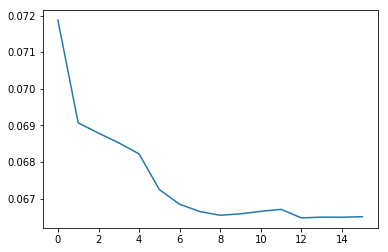

In [30]:
plt.plot(tmp)

### Evaluation

In [31]:
test_dataset = RFFullDataset(X_test, y_test, scaler)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

#### perspective of data

In [32]:
from sklearn.metrics import mean_absolute_error

#### predict

In [ ]:
original_val = []
test_res = []
for data, _ in test_dataloader:
    data = Variable(data).cuda().float()
    rec_X = model.forward(data).cpu().detach().numpy()
    original = data.cpu().detach().numpy()
    tmp = mean_absolute_error(rec_X.reshape(batch_size,-1).swapaxes(0,1), original.reshape(batch_size, -1).swapaxes(0,1), multioutput='raw_values')
    test_res.extend(tmp)
    val = original.reshape(batch_size,-1).mean(axis=1)
    original_val.extend(val)
    print('val: {:.10f}'.format(val.mean()))
    print('loss:{:.10f}'.format(tmp.mean()))

val: 0.5806002617
loss:0.0665535554
val: 0.5810096264
loss:0.0669751093
val: 0.5812035799
loss:0.0668887943
val: 0.5840669870
loss:0.0656890869
val: 0.5820801854
loss:0.0657608509
val: 0.5828642845
loss:0.0661988184
val: 0.5830373764
loss:0.0666112304
val: 0.5870628953
loss:0.0662937686
val: 0.5857159495
loss:0.0651282743
val: 0.5837551355
loss:0.0657777041
val: 0.5831604600
loss:0.0659972206
val: 0.5802273154
loss:0.0670585483
val: 0.5843005180
loss:0.0658377111
val: 0.5801360607
loss:0.0683899298
val: 0.5850769877
loss:0.0656012148
val: 0.5819310546
loss:0.0661302209
val: 0.5795316100
loss:0.0674845055
val: 0.5821075439
loss:0.0662688836
val: 0.5848955512
loss:0.0657683760
val: 0.5830618739
loss:0.0658550784
val: 0.5797419548
loss:0.0664668679
val: 0.5778223276
loss:0.0677022785
val: 0.5824850798
loss:0.0667129159
val: 0.5829463601
loss:0.0659247637
val: 0.5857030153
loss:0.0661964044
val: 0.5831208825
loss:0.0668195188
val: 0.5799851418
loss:0.0666360036
val: 0.5873264670
loss:0.064

In [ ]:
tmp2.cpu().detach().numpy().mean()

In [ ]:
test_res.shape

In [ ]:
test_res.mean()